# Linear Regression

To simplify, Linear Regression is simply a weighted sum of inputs plus a constant:


$\hat{y} = \theta_{0} + \theta_{1}x_1 + \theta_{2}x_2 + ... + \theta_{n}x_n$


### Simple Linear Regression

Creating a simple one dimentional function of a linear relation between X and y: 

$\hat{y} = \theta_{0} + \theta_{1}x_1 $

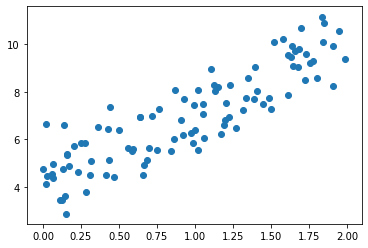

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100) 
y = 4 + 3 * X + np.random.randn(100)

data = pd.DataFrame({'covariate':X, 'response':y})

plt.scatter(X, y)

### Least Squares Estimates

the least squares estimates for $\theta_{0}$ and $\theta_{1}$ is:

$\theta_{0} = \frac{\sum_{i=0}^{n}(X_i - \hat{X_n})(Y_i - \hat{Y_n})}{\sum_{i=0}^{n}(X_i - \hat{X_n})^2} $

$\theta_{1} = \hat{Y_n} - \theta_{0} * \hat{X_n} $


In [3]:
def deviation(array):
    return [x-np.mean(array) for x in array]

def squared_deviation(array):
    return [(x-np.mean(array))**2 for x in array]

print(deviation(X)[:4])
print(squared_deviation(X)[:4])

[-0.8484402136375487, -0.5582723106900399, -0.26855207446359775, 0.7142498952860449]
[0.7198507961173294, 0.3116679728831964, 0.07212021669870175, 0.5101529129161261]


In [4]:
def least_squares_fit(X, y):
    numerator = np.sum([x_dev*y_dev for x_dev, y_dev in zip(deviation(X), deviation(y))])
    denominator = np.sum(squared_deviation(X))
    
    slope = numerator/denominator

    intercept = np.mean(y) - slope * np.mean(X) 

    return intercept, slope

least_squares_fit(X, y)

(3.714959923529517, 3.2492792391407606)

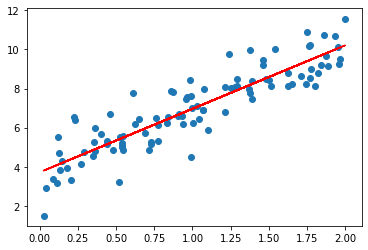

In [5]:
intercept, slope = least_squares_fit(X, y)

y_pred = intercept + X*slope

plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

### Plot the residuals

The error term or residuals assume to be:

* Normally distributed
* Homoscedastic (same variance for every X)
* Independent 


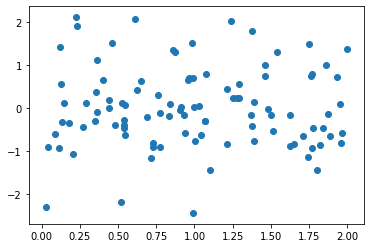

In [6]:
residuals = [ (real - pred) for real, pred in zip(y, y_pred)]
plt.scatter(X, residuals)

There is no trend or variance changing for X 

In [13]:
pd.Series(residuals).describe()

count    1.000000e+02
mean    -4.751755e-16
std      9.204446e-01
min     -2.443782e+00
25%     -6.090730e-01
50%     -1.023224e-01
75%      6.244530e-01
max      2.113768e+00
dtype: float64

(array([ 3.,  0.,  4., 18., 21., 22., 12.,  7.,  8.,  5.]),
 array([-2.4437822 , -1.98802713, -1.53227206, -1.076517  , -0.62076193,
        -0.16500687,  0.2907482 ,  0.74650327,  1.20225833,  1.6580134 ,
         2.11376846]),
 <a list of 10 Patch objects>)

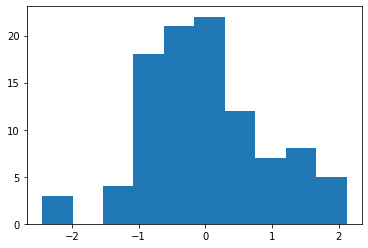

In [9]:
plt.hist(residuals)

The hist seem like to have a small skeweness to the left (Negative skewed)

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([3.71495992, 3.24927924])